In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
# import tensorflow_text as text
# from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

import io
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization
import pickle
import sklearn
from sklearn.metrics import confusion_matrix

tf.get_logger().setLevel('ERROR')


from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/My Drive/Bookpred/Assignment 2"
%cd {path}
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bookpred/Assignment 2
 8.prep_IMDB.ipynb
'Assignment 2 Track.gdoc'
 bert
 best_model
 book_rating_test.csv
 book_rating_train.csv
 book_text_features_countvec
 book_text_features_doc2vec
 book_text_features_tfidf
 COMP30027_Project2_spec_2023S1.pdf
'Copy of model.png'
 English
'English (1)'
'Feature engineering.ipynb'
 full_dataset
 history.pkl
 history_v.pkl
 lgbm_class_weight.joblib
 lgbm_cv.joblib
 lgbm_cw.joblib
 lgbm_normal.joblib
 lgbm_oversampling.joblib
 matrix.npz
 Model.ipynb
 model.png
 multilingual_best
 multilingual_epochs
 output.csv
 Oversampling
 Oversampling_real
 partition
 random_forest_doc.joblib
 random_forest.joblib
 random_forest_num.joblib
 rf_cw.joblib
 rf_normal.joblib
 rf_smote.joblib
 small_bert
 smallbert_class_weight.png
 smallbert_focal.png
 smallbert_normal.png
 smallbert_oversampling_minority.png
 Test


This notebook partially adopts certain code blocks from ChatGPT for  model saving, loading, viz However, the core ideads are original

In [ ]:

# Write the list to a file using pickle.dump()
# with open('val_prediction_smallbert_oversampling.pkl', 'wb') as f:
#     pickle.dump(val_prediction, f)

# Read the list from the file using pickle.load()
with open('val_prediction_smallbert_oversampling.pkl', 'rb') as f:
    prediction_list = pickle.load(f)

# Write the list to a file using pickle.dump()
# with open('val_output_smallbert_oversampling.pkl', 'wb') as f:
#     pickle.dump(val_output, f)

# Read the list from the file using pickle.load()
with open('val_output_smallbert_oversampling.pkl', 'rb') as f:
    output_list = pickle.load(f)



confusion_matrix(output_list, prediction_list)

array([[   0, 1172,    0],
       [   0, 3240,    0],
       [   0,  198,    0]])

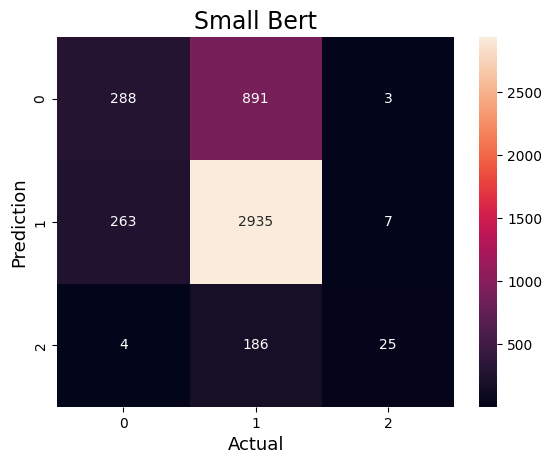

In [ ]:
import pickle


# Write the list to a file using pickle.dump()
# with open('val_prediction_smallbert_normal.pkl', 'wb') as f:
#     pickle.dump(val_prediction, f)

# Read the list from the file using pickle.load()
with open('val_prediction_smallbert_norm.pkl', 'rb') as f:
    prediction_list = pickle.load(f)

# Write the list to a file using pickle.dump()
# with open('val_output_smallbert_norm.pkl', 'wb') as f:
#     pickle.dump(val_output, f)

# Read the list from the file using pickle.load()
with open('val_output_smallbert_norm.pkl', 'rb') as f:
    output_list = pickle.load(f)


import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(output_list, prediction_list)

 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Small Bert',fontsize=17)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# assume y_true and y_pred are the true and predicted labels, respectively
print('Accuracy:', round(accuracy_score(output_list, prediction_list)*100,3))
print('F1 Score:', round(f1_score(output_list, prediction_list, average='weighted')*100,3))
# print('Recall:', round(recall_score(output_list, prediction_list, average='weighted'), 3))
print('Precision:', round(precision_score(output_list, prediction_list, average='weighted')*100, 3))
# print('\nClassification Report:\n', classification_report(output_list, prediction_list))

Accuracy: 70.578
F1 Score: 66.097
Precision: 67.613


In [ ]:
# import pickle

# # Write the list to a file using pickle.dump()
# # with open('val_prediction_smallbert_class_weights.pkl', 'wb') as f:
# #     pickle.dump(val_prediction, f)

# # Read the list from the file using pickle.load()
# with open('val_prediction_smallbert_class_weights.pkl', 'rb') as f:
#     prediction_list = pickle.load(f)

# # Write the list to a file using pickle.dump()
# # with open('val_output_smallbert_class_weights.pkl', 'wb') as f:
# #     pickle.dump(val_output, f)

# # Read the list from the file using pickle.load()
# with open('val_output_smallbert_class_weights.pkl', 'rb') as f:
#     output_list = pickle.load(f)

# import sklearn
# from sklearn.metrics import confusion_matrix

# confusion_matrix(output_list, prediction_list)

array([[  43, 1129,    0],
       [  12, 3227,    1],
       [   0,  195,    3]])

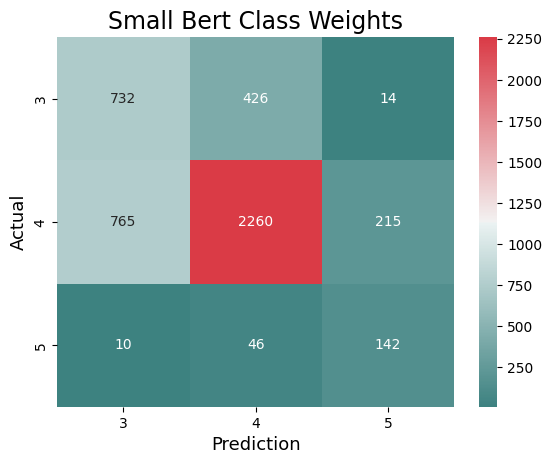

In [ ]:
import pickle

# Write the list to a file using pickle.dump()
# with open('val_prediction_smallbert_cw.pkl', 'wb') as f:
#     pickle.dump(val_prediction, f)

# Read the list from the file using pickle.load()
with open('val_prediction_smallbert_cw.pkl', 'rb') as f:
    prediction_list = pickle.load(f)

# Write the list to a file using pickle.dump()
# with open('val_output_smallbert_cw.pkl', 'wb') as f:
#     pickle.dump(val_output, f)

# Read the list from the file using pickle.load()
with open('val_output_smallbert_cw.pkl', 'rb') as f:
    output_list = pickle.load(f)


confusion_matrix(output_list, prediction_list)
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cmap = sns.diverging_palette(550, 10, as_cmap=True)
cm = confusion_matrix(output_list, prediction_list)

 
#Plot the confusion matrix.50
sns.heatmap(cm,
            annot=True,
            fmt='g', cmap = cmap)
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Small Bert Class Weights',fontsize=17)
plt.xticks([0.5,1.5,2.5] , labels=['3', '4', '5'])
plt.yticks([0.5,1.5,2.5] , labels=['3', '4', '5'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# assume y_true and y_pred are the true and predicted labels, respectively
print('Accuracy:', round(accuracy_score(output_list, prediction_list)*100,3))
print('F1 Score:', round(f1_score(output_list, prediction_list, average='weighted')*100,3))
# print('Recall:', round(recall_score(output_list, prediction_list, average='weighted'), 3))
print('Precision:', round(precision_score(output_list, prediction_list, average='weighted')*100, 3))
# print('\nClassification Report:\n', classification_report(output_list, prediction_list))

Accuracy: 67.983
F1 Score: 69.231
Precision: 72.132


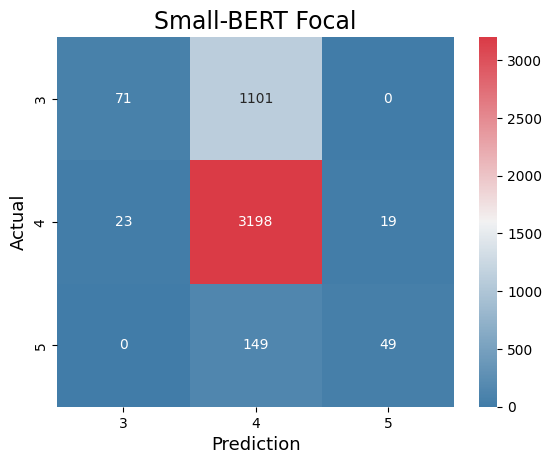

In [ ]:
# Write the list to a file using pickle.dump()
# with open('val_prediction_smallbert_focal.pkl', 'wb') as f:
#     pickle.dump(val_prediction, f)
import pickle
# Read the list from the file using pickle.load()
with open('val_prediction_smallbert_focal.pkl', 'rb') as f:
    prediction_list = pickle.load(f)

# Write the list to a file using pickle.dump()
with open('val_output_smallbert_focal.pkl', 'rb') as f:
    output_list = pickle.load(f)


cm = confusion_matrix(output_list, prediction_list)
#Plot the confusion matrix.
cmap = sns.diverging_palette(600, 10, as_cmap=True)

 
#Plot the confusion matrix.
#Plot the confusion matrix.50
sns.heatmap(cm,
            annot=True,
            fmt='g', cmap = cmap)
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Small-BERT Focal',fontsize=17)
plt.xticks([0.5,1.5,2.5] , labels=['3', '4', '5'])
plt.yticks([0.5,1.5,2.5] , labels=['3', '4', '5'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# assume y_true and y_pred are the true and predicted labels, respectively
print('Accuracy:', round(accuracy_score(output_list, prediction_list)*100,3))
print('F1 Score:', round(f1_score(output_list, prediction_list, average='weighted')*100,3))
# print('Recall:', round(recall_score(output_list, prediction_list, average='weighted'), 3))
print('Precision:', round(precision_score(output_list, prediction_list, average='weighted')*100, 3))
# print('\nClassification Report:\n', classification_report(output_list, prediction_list))

Accuracy: 71.974
F1 Score: 62.905
Precision: 72.828
